In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data cleaning and Processing

In [38]:
data = pd.read_csv('stores_sales_forecasting.csv', encoding='unicode_escape')

In [53]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month_day,month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11-08,2016-11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11-08,2016-11
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10-11,2015-10
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,06-09,2014-06
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,06-09,2014-06


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [40]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [41]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [42]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2116    False
2117    False
2118    False
2119    False
2120    False
Length: 2121, dtype: bool

In [43]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

In [44]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [57]:
data['Product Name'].value_counts()

Product Name
KI Adjustable-Height Table                                                   18
Staple-based wall hangings                                                   16
Situations Contoured Folding Chairs, 4/Set                                   15
Eldon Wave Desk Accessories                                                  14
Global Wood Trimmed Manager's Task Chair, Khaki                              14
                                                                             ..
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops             1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled      1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                  1
Ultra Commercial Grade Dual Valve Door Closer                                 1
Name: count, Length: 380, dtype: int64

# Data visiualizing

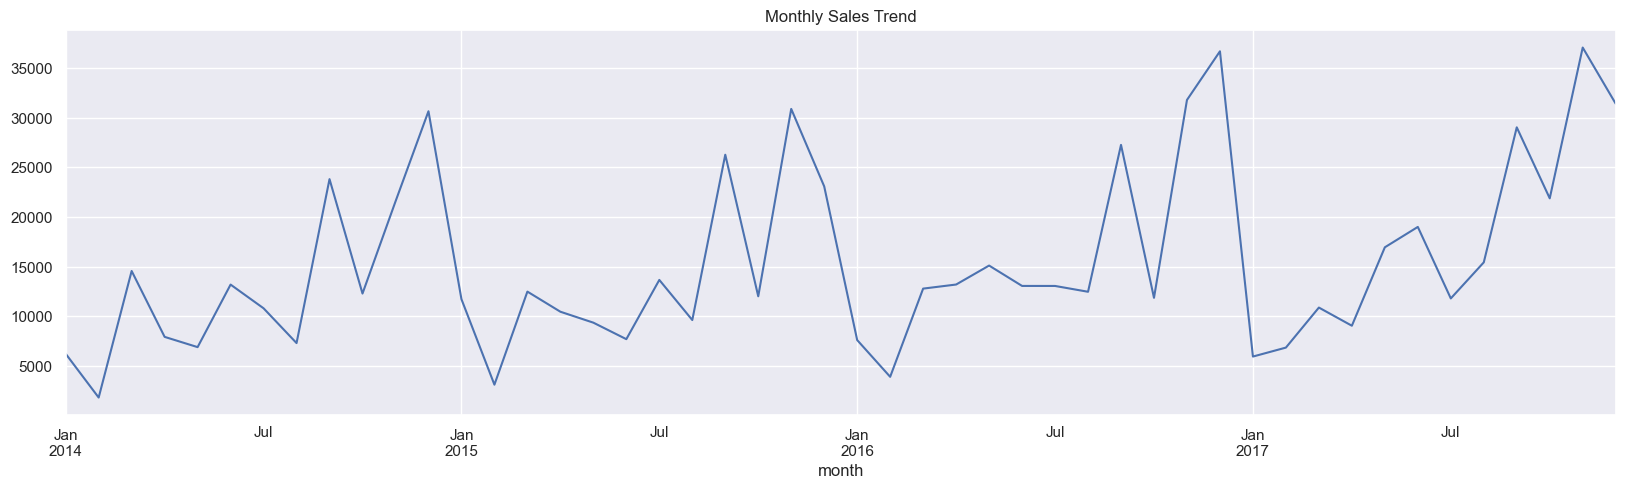

In [49]:
data['month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('month')['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.show()

In [59]:
data['month'].value_counts()

month
2017-12    106
2017-11     99
2016-12     84
2017-09     83
2016-09     83
2016-11     81
2015-11     77
2014-12     74
2017-10     71
2015-12     64
2014-11     62
2015-09     60
2014-09     56
2017-05     53
2017-07     52
2017-06     51
2016-10     48
2017-04     44
2016-05     43
2016-03     41
2015-07     40
2016-07     39
2017-08     39
2017-03     38
2016-06     38
2015-10     36
2016-04     35
2014-03     33
2014-07     33
2015-04     33
2015-08     32
2014-10     32
2014-06     30
2015-05     30
2016-08     29
2015-03     28
2017-02     26
2015-06     26
2014-04     26
2017-01     24
2014-05     24
2014-08     24
2016-01     22
2014-01     20
2016-02     19
2015-01     15
2015-02     11
2014-02      7
Freq: M, Name: count, dtype: int64

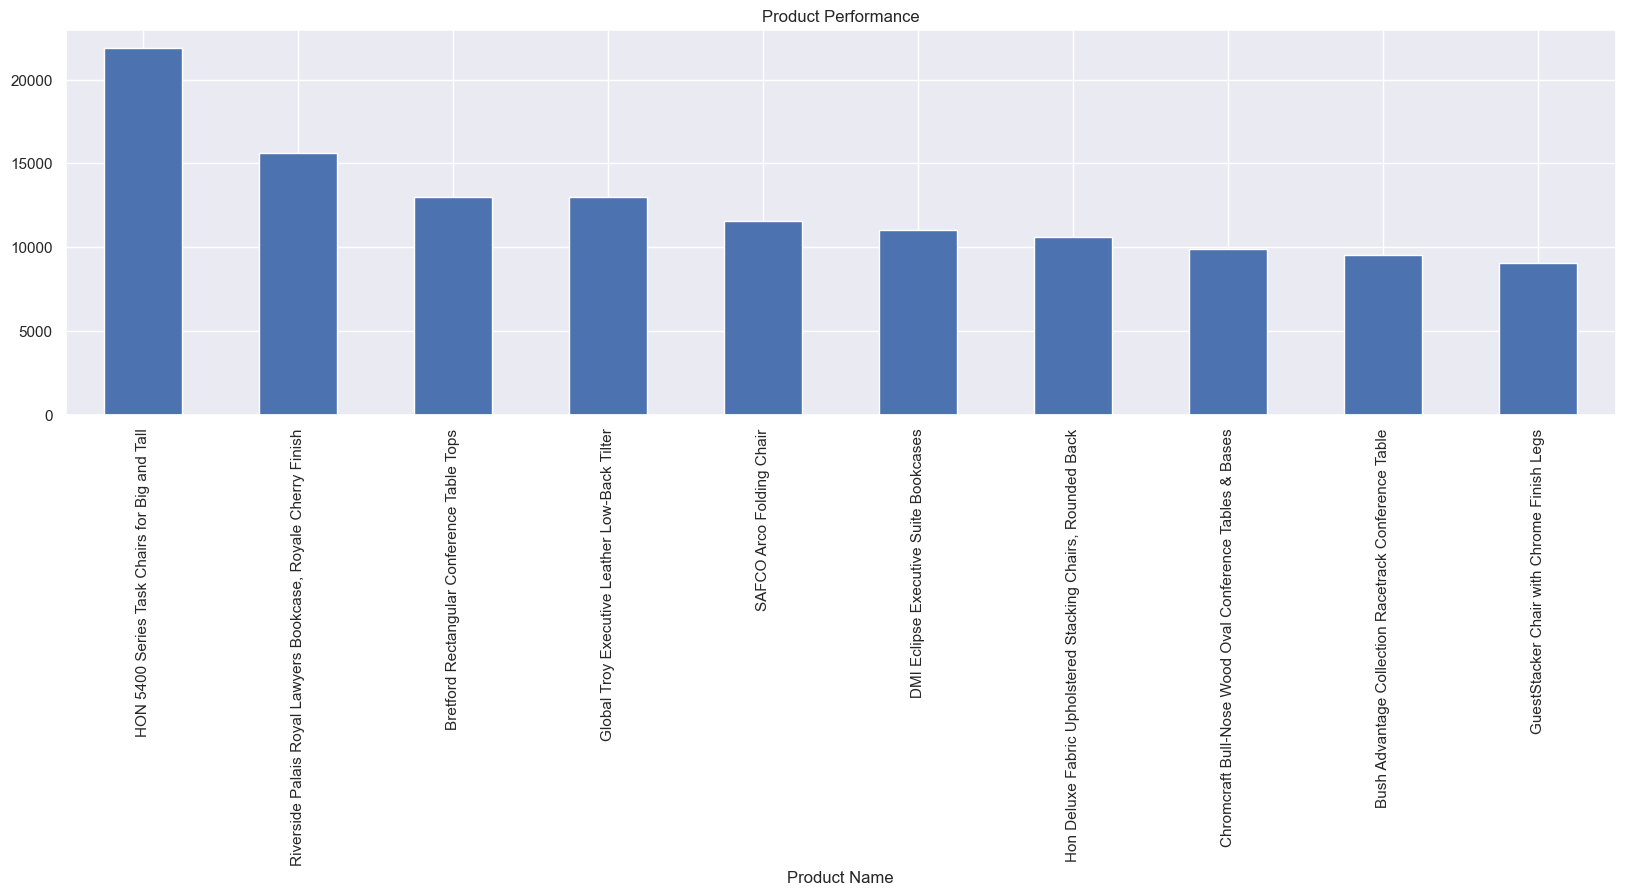

In [45]:
product_sales = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind='bar', title='Product Performance')
plt.show()

In [62]:
data['Product Name'].sort_values('Produt ID')

TypeError: Series.sort_values() takes 1 positional argument but 2 were given

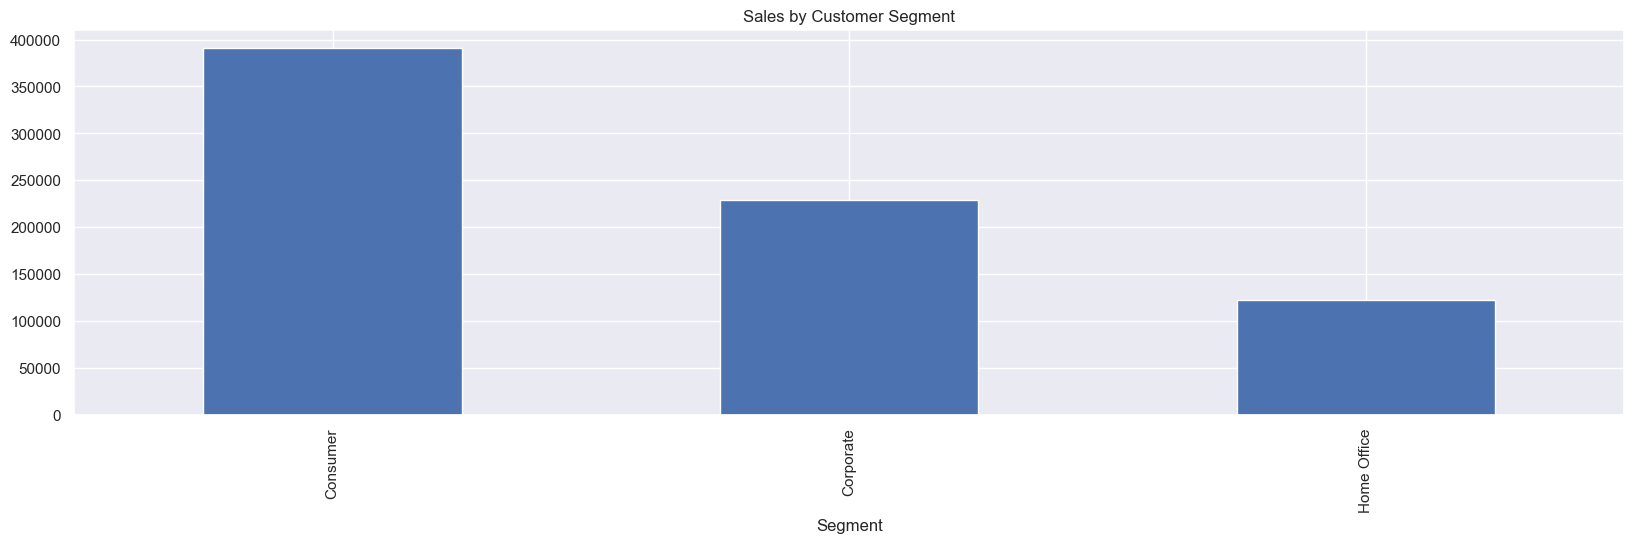

In [46]:
segment_sales = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales.plot(kind='bar', title='Sales by Customer Segment')
plt.show()

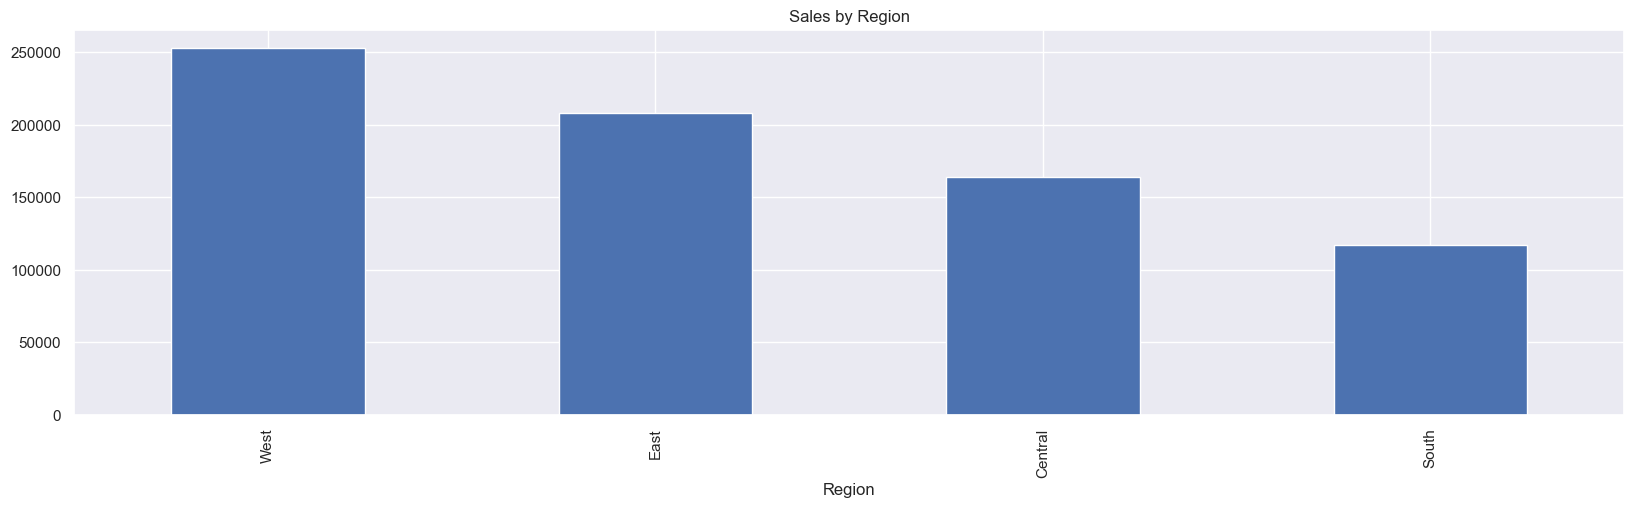

In [47]:
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()

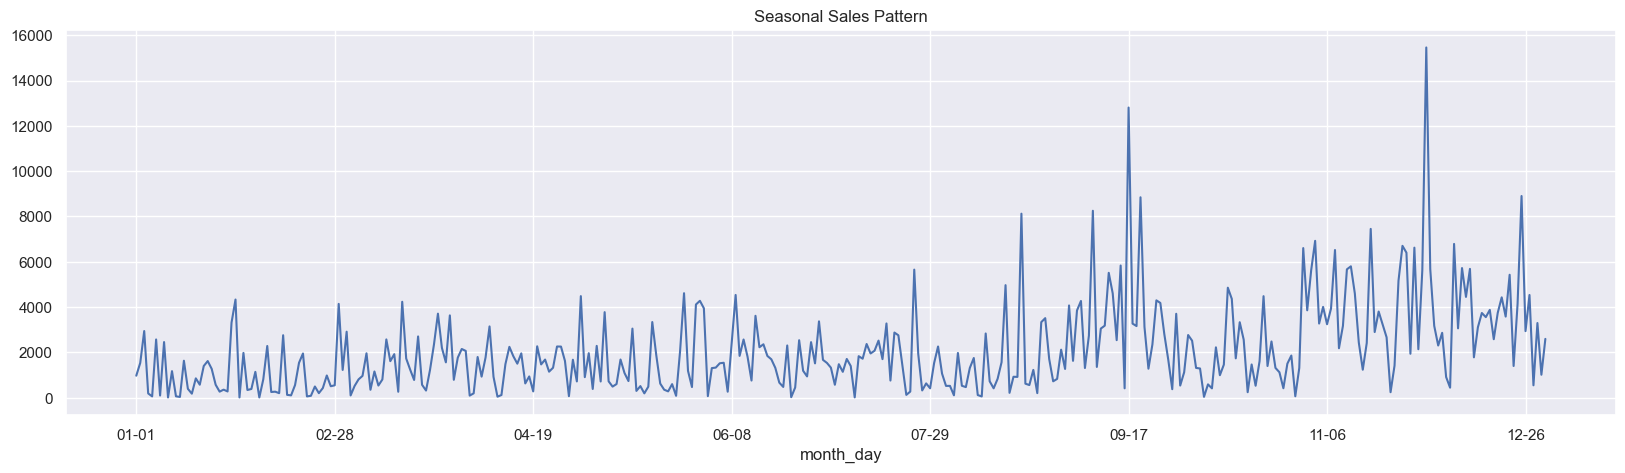

In [48]:
data['month_day'] = data['Order Date'].dt.strftime('%m-%d')
seasonal_sales = data.groupby('month_day')['Sales'].sum()
seasonal_sales.plot(kind='line', title='Seasonal Sales Pattern')
plt.show()

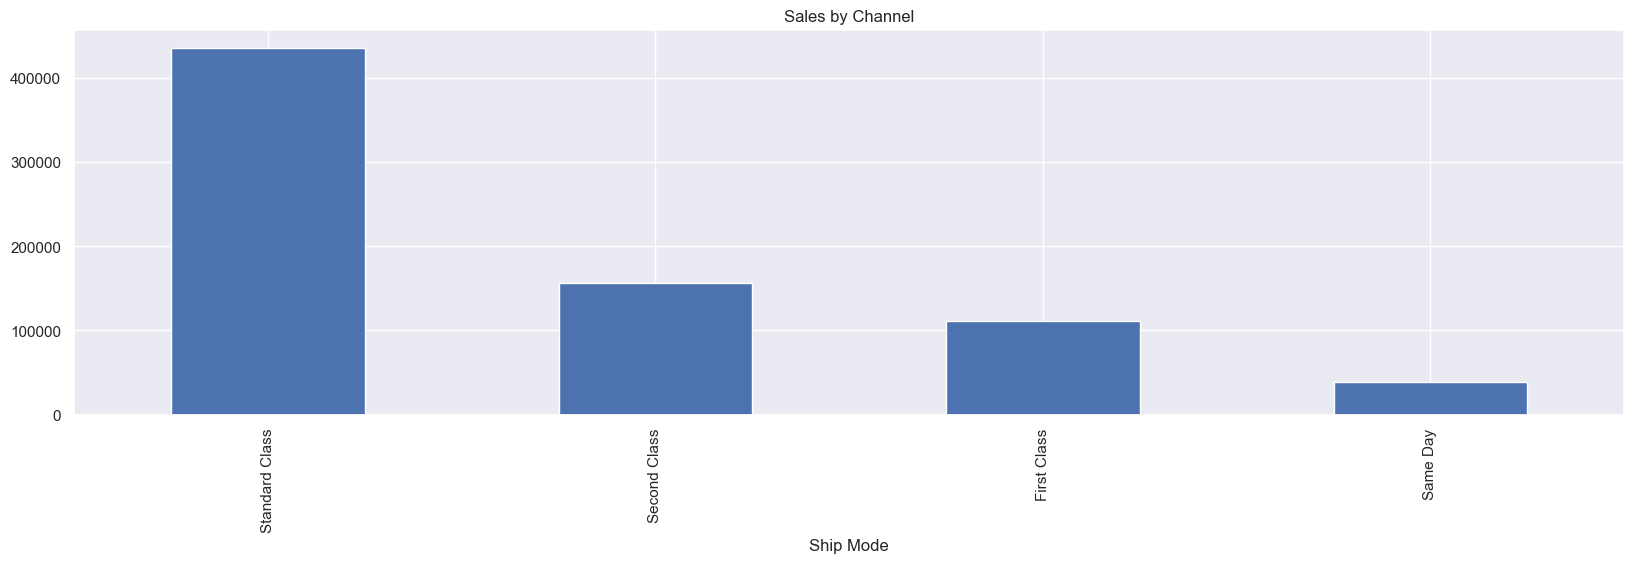

In [50]:
channel_sales = data.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
channel_sales.plot(kind='bar', title='Sales by Channel')
plt.show()

In [51]:
correlation_matrix = data[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.437464 -0.028576  0.173510
Quantity  0.437464  1.000000 -0.015695  0.061213
Discount -0.028576 -0.015695  1.000000 -0.483769
Profit    0.173510  0.061213 -0.483769  1.000000


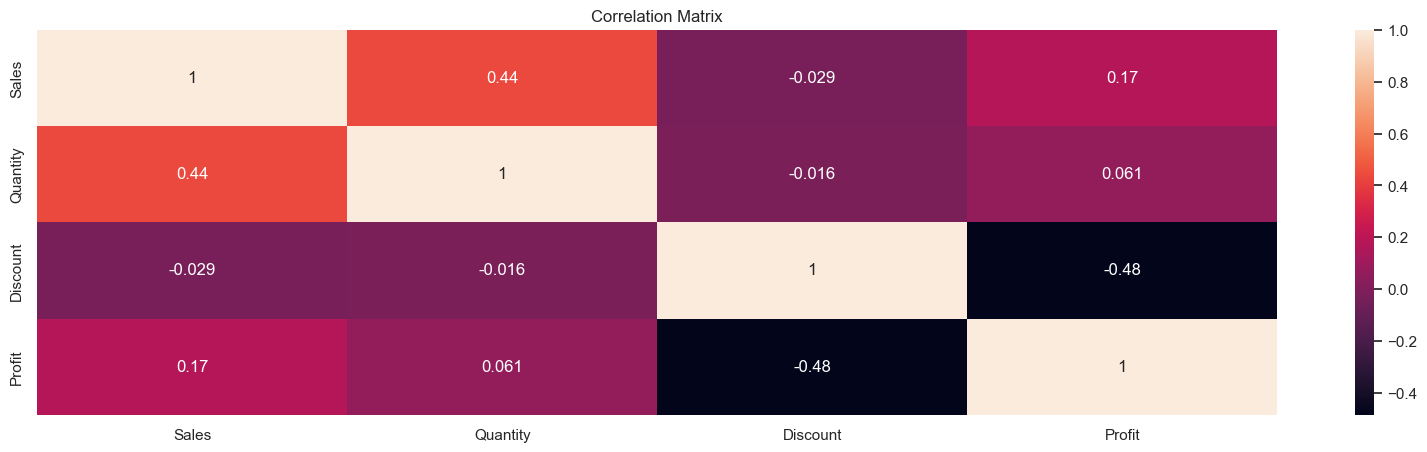

In [52]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()



1 The higest montly sales is 2017-12 106
2 The highest performance is series task chairs for big and Tall
3 The highest sales region is West 
4 The highest channesl is Standard Class 

5 Sales vs Quantity:
Moderate positive correlation (0.44)
Indicates higher sales are associated with larger quantities sold.
Sales vs Discount:

Slight negative correlation (-0.03)
Suggests increased discounts might lead to slightly lower sales.
Sales vs Profit:

Weak positive correlation (0.17)
Implies higher sales may contribute slightly to increased profitability.
Quantity vs Profit:

Weak positive correlation (0.06)
Indicates larger quantities sold may have a slight positive impact on profitability.
Discount vs Profit:

Moderate negative correlation (-0.48)
Shows higher discounts are associated with lower profitability

